In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import requests
from bs4 import BeautifulSoup, NavigableString, Tag, Comment
from konlpy.corpus import kolaw  
from konlpy.tag import Twitter
import nltk
from wordcloud import WordCloud
from PIL import Image

In [2]:
from selenium import webdriver

# driver_path = r"D:\yun\dev-tools\chromedriver.exe"
# browser = webdriver.Chrome(executable_path=driver_path)

In [3]:
# baseurl = 'https://www.google.com/search?q='
# keyword = input("Input keyword: ")

# url=baseurl+quote_plus(keyword)

url = "https://ko.wikipedia.org/wiki/%EA%B3%A0%EC%96%91%EC%9D%B4"
driver= webdriver.Chrome('D:\yun\dev-tools\chromedriver.exe')
driver.get(url)

In [4]:
html = driver.page_source
soup = BeautifulSoup(html,features="html.parser")

In [125]:
text1 = soup.select("p")
# text2=soup.select("p.wrap_item.item_type_text")
# text1

In [5]:
content=soup.get_text('\n', strip=True)

In [106]:
text=[]
for t in text1:
    t.get_text()

In [6]:
# content = soup.get_text('\n', strip=True)
print(content)    

성으로 작용하기 때문에 용량을 잘 조절해서 써야 한다. 또한
발모제
로 많이 쓰이는
미녹시딜
등을 고양이 털이 빠진 환부에 발라주었다가 고양이가 핥아서 때때로 치명적일 수 있다.
또한 집에서 많이 쓰이고 고양이 주위에 놓일 수 있는 좀약이나
나프탈렌
제제를 포함하여
살서제
,
살충제
,
제초제
등도 고양이에게 위험하다. 고양이 주변에 놓일 수 있는 페놀 기반의 상품을 예로 들면, 파인솔,
데톨
, 헥사클로로펜과 같은 세정제 종류도 고양이에게 치명적일 수 있다.
부동액
으로 쓰이는 에틸렌 글리콜은 고양이가 잘 먹을 수 있는데, 한숟갈 분량만 먹어도 치명적이다.
에센셜 오일
도 고양이에게 독성을 나타내는데, 티트리 오일이나 티트리 오일 베이스의 화장품, 샴푸로 인해 심각한 질환을 앓은 고양이의 경우도 보고되었다. 일반적으로 고양이에게 가장 많이 중독을 일으키는 것은 살서제나 부동액이다.
사람이 먹는 음식도 고양이에게 독성을 띨 수 있는데, 예를 들어 고양이가
초콜릿
을 먹으면
테오브로민
중독을 일으킬 수 있다. 많은 양의
양파
나
마늘
도 고양이에게 독성을 띤다고 한다. 많은 관상용 화초가 여러 동물들에게 독성이 있고 고양이도 예외는 아니다. 이러한 것들은 고양이가 미치지 못하는 곳에 두어야 한다. 예를 들면
백합
은 고양이에게 치명적인 신장 손상을 일으킬 수 있으며,
필로덴드론속
식물 또한 고양이에게 독성이 있다.
습성
[
편집
]
사회성
[
편집
]
고양이끼리 친구가 될 수 있다. 다른 고양이를 그루밍해 주는 고양이
무리 생활을 하지는 않지만 자신보다 높은
서열
의 고양이의
식사
순서를 지키는 등
서열
의식이 갖춰져 있다. 고양이 울음소리의
사회적 역할
은
침입자
에 대한 것과 나머지 세 가지 소리의 종류에 따라 다르다.
코
로 내는
가르랑
소리는 고양이 간의 인사 혹은 다치거나 아픈 고양이에 대한 사회적 관심을 표현하는 것이다. 또한
비음
을 섞은 떨림 소리는
인사
를 위한 것이다. 천천히 다가오며 『야옹』과 같이 입을 열며 내는 울음소리는 종류가 많은데, 

In [8]:
wc = WordCloud()
wc_model = wc.generate(content)

In [9]:
t = Twitter()

In [12]:
ko_tokens = t.nouns(content)
ko_tokens[:300]     #단어들 뽑아서 진행
one_word_token = []
for token in ko_tokens:
    if len(token) == 1 and token not in one_word_token:
        one_word_token.append(token)
        # print(token)
# one_word_token

In [13]:
tmp = np.unique(ko_tokens, return_counts=True)
tmp_df = pd.DataFrame({'word' : tmp[0], 'cnt': tmp[1]})
tmp_df.sort_values(by=['cnt'], ascending=False).head()

,word,cnt
69,고양이,294
630,수,52
391,문서,41
1200,편집,36
46,것,35


In [14]:
ko_model = nltk.Text(ko_tokens)
_model = nltk.Text(ko_tokens)
ko_data = ko_model.vocab().most_common(300)
ko_data[:10]

[('고양이', 294),
 ('수', 52),
 ('문서', 41),
 ('편집', 36),
 ('것', 35),
 ('동물', 27),
 ('를', 27),
 ('포함', 26),
 ('다른', 26),
 ('이', 24)]

In [30]:
cat = Image.open('data-files1/cat2.jpg')   # 사진은 2가지 색만 있는것으로만 가능
cat
cat_array = np.array(cat)
cat_array.shape

(225, 225, 3)

In [36]:
ko_data_dict = dict(ko_data) # {단어: 빈도수}  dict으로 변경
wc = WordCloud(font_path=r"D:\yun\workspace\Font\NanumGothic.ttf", 
                mask=cat_array, background_color='black')
wc_model2 = wc.generate_from_frequencies(ko_data_dict)

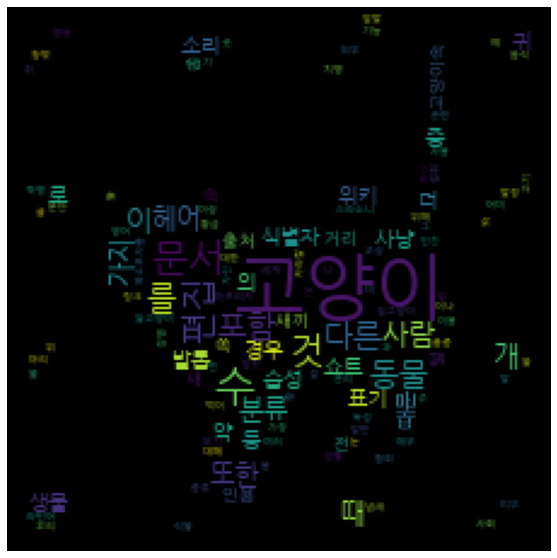

In [38]:
plt.figure(figsize=(10,10))
plt.imshow(wc_model2)
plt.axis('off')
plt.show()